In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Basic

## Optmization

In [5]:
from scipy.optimize import minimize

Minimize $ f(x) = (x-3)^2$

In [31]:
def f(x):
    return (x-3)**2

res = minimize(f, 4) # we always need to set an inicial guess, in this casa, x=4
#res
res.x

array([2.99999999])

Minimize $ f(x,y) = (x-1)^2+(y-2,5)^2 $ subject to:
$$ x-2y+2 \geq  0 $$
$$ -x-2y+6 \geq  0 $$
$$ -x+2y+2 \geq  0 $$
$$ x \geq 0  $$
$$ y \geq 0  $$

In [21]:
f = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2
cons = ({'type': 'ineq','fun': lambda x: x[0]-2*x[1]+2},
        {'type': 'ineq','fun': lambda x: -x[0]-2*x[1]+6},
        {'type': 'ineq','fun': lambda x: -x[0]+2*x[1]+2})
bnds = ((0,None), (0,None))
res = minimize(f,(2,0), bounds = bnds, constraints = cons) # we always need to provide an inicial guess, in this case, (2,0)
res.x

array([1.4, 1.7])

## Interpolation

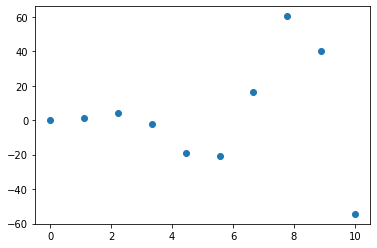

In [26]:
x = np.linspace(0,10,10)
y = x**2 * np.sin(x)
plt.scatter(x,y)

In [27]:
from scipy.interpolate import interp1d
f = interp1d(x,y, kind='cubic')
x_dense = np.linspace(0,10,100)
y_dense = f(x_dense)

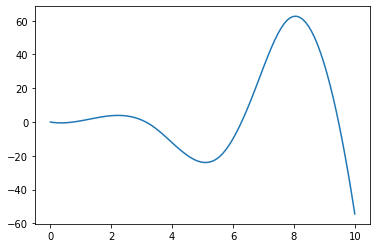

In [28]:
plt.plot(x_dense, y_dense)

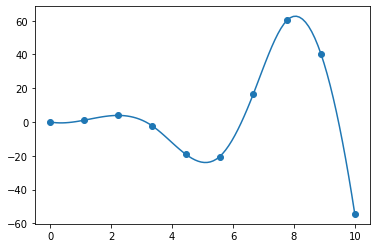

In [39]:
plt.plot(x_dense, y_dense)
plt.scatter(x, y,)

# Curve Fitting

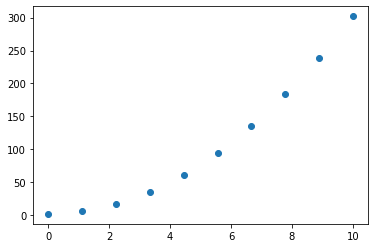

In [30]:
x_data = np.linspace(0,10,10)
y_data= 3*x_data**2 + 2 # y = 3x^2
plt.scatter(x_data,y_data)

Want to fit the data to the curve $y = ax^2 + b$. The main goal here is determine the values of $a$ and $b$

In [35]:
from scipy.optimize import curve_fit
#finds the optimal values to fit the choosen curve

def func (x, a, b):
    return a*x**2 + b # return a*x^2 + b

popt, pcov = curve_fit(func, x_data, y_data, p0 = (1,1))
popt

array([3., 2.])

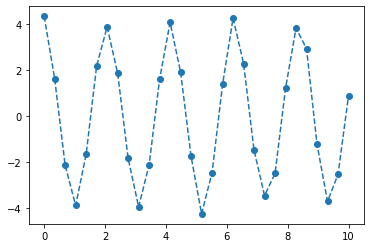

In [43]:
t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

plt.plot(t_data, y_data, 'o--')

$ \omega = 2 \pi f $, $ f=1/T $, and $ T \approx 2 $ seconds. Some inicial guess:
- $ \omega = 2 \pi (1/2) = \pi $ -> **need's to be a very close guess**
- $ A=4 $
- $ \phi = 0 $

In [48]:
from scipy.optimize import curve_fit
def func(x, A, w, phi):
    return A*np.cos(w*x+phi) # return A*cos(w*x*phi)
popt, pcov = curve_fit(func, t_data, y_data, p0=(4,np.pi, 0)) #with a wrong guess it will be a mess
popt

array([3.94836219, 2.99899521, 0.1041135 ])

In [50]:
#the error in each parameter. [0]:A, [1]:w, [2]:phi
errors = np.sqrt(np.diag(pcov))
error

array([0.05117448, 0.00430857, 0.02575703])

## Special Functions

Legendre Polynomials $P_l(x)$: satisfy $(1-x^2)y'' -2xy'+l(l+1)y = 0$
* The angular component of the spherical Schrodinger Equation which permits non-infinite solutions

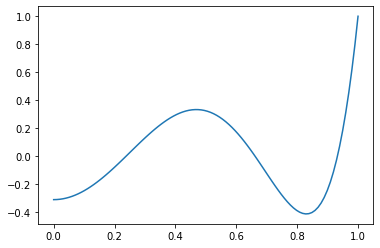

In [54]:
from scipy.special import legendre
x = np.linspace(0,1,100)
plt.plot(x, legendre(6)(x))
plt.show()
#print(legendre(6)(x))

Bessel functions $J_{\alpha}(x)$: satisfy $x^2 y'' + xy' + (x^2-\alpha^2)y = 0$
* Laplace's Equation in Polar Coordinates

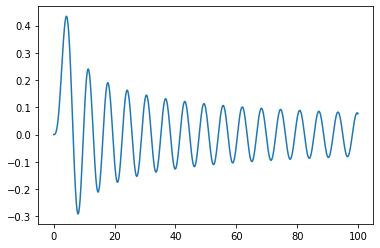

In [66]:
from scipy.special import jv

x = np.linspace(0,100,1000)
plt.plot(x, jv(3,x))
plt.show()

## Calculus